# Non-Negative Matrix Factorization for Recommendation System

NMF is a method of reducing dimensions like PCA, but NMF keeps the components and characteristics of the arrays positive. The aim is to export easily interpretable components to media that by their nature can not display negative values ​​such as the pixels of an image, video, spectral data of audio, for understanding the meaning of text and more.

To the problem of normalized table factorization, we can add various destinations beyond the non-negativity of the components.
In this exercise we have the limitation of the Frobian norm minimization of base components and vectors. With the normalization we look to reduce the coefficients so that there is little variation and the model is more stable and in addition so that some feature does not over-adapt to the model and spoils the generalization error of the model. 

We will use databases derived from user posts on a social networking platform [LinkedDit](https://github.com/AGiannoutsos/LinkedDIT/) for this application.
Using the NMF algorithm, we will extract features from this data.
Then, using an algorithm of near neighborhoods, we'll see which posts correlate.
As a result, these postings are recommended for each user to consume the suggested content. 

## For the project

1.   For a start we will try to get the features from the data posted by users

2.   We will analyze, implement and test the NMF algorithm

3.   We will compose it all together and together with the nearest neighbors algorithm we will build a recommenstation system 



# Data Extraction

In this section we will extract the data from the JSON API. More specifically, the posts of our social networking platform [LinkedDit](https://github.com/AGiannoutsos/LinkedDIT/). We will then convert the data from JSON to Numpy matrices with the help of the algorithms Bag of Words Vectorizer and TF-IDF Vectorizer 

## The Data Format

The JSON data have this form. We will convert them into a python dictionary and from this we will receive useful data such as text and comments. 

In [2]:
JSON_DATA = """[
  {
    "id":"10000",
    "date":"29 Jul 2021",
    "user":{
      "id":"12312312",
      "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
      "firstName":"Pipis",
      "lastName":"Papa"
    },
    "content":{
      "text":"lorpon this is a tsting post",
      "file":{
        "type":"image",
        "url":"https://cdn.quasar.dev/img/mountains.jpg"
      }
    },
    "likes":[
      {
        "id":"566612312",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Smaragda",
        "lastName":"Reppa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepomnai ",
            "visibility":false
          }
        ]
      },
      {
        "id":"423423",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Pipis",
        "lastName":"Pipa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom this is mine profesional expereince",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom this is mine education",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepom i know some skills that in 3 years will be irrelevant",
            "visibility":true
          }
        ]
      }
    ],
    "comments":[
      {
        "user":{
          "id":"12312312",
          "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
          "firstName":"Andreas",
          "lastName":"Giannoutsos"
        },
        "content":{
          "text":"lorpon this is a tsting comment"
        }
      },
      {
        "user":{
          "id":"566612312",
          "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
          "firstName":"Smaragda",
          "lastName":"Reppa"
        },
        "content":{
          "text":"yees lorpon this is another testing comment"
        }
      }
    ]
  },
  {
    "id":"10002340",
    "date":"29 Jul 2021",
    "user":{
      "id":"3343453453",
      "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
      "firstName":"User3242",
      "lastName":"Userpaa"
    },
    "content":{
      "text":"lorpon this is a tsting post",
      "file":{
        "type":"video",
        "url":"https://commondatastorage.googleapis.com/gtv-videos-bucket/sample/BigBuckBunny.mp4"
      }
    },
    "likes":[
      {
        "id":"566612312",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Smaragda",
        "lastName":"Reppa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepomnai ",
            "visibility":false
          }
        ]
      },
      {
        "id":"423423",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Pipis",
        "lastName":"Pipa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom this is mine profesional expereince",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom this is mine education",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepom i know some skills that in 3 years will be irrelevant",
            "visibility":true
          }
        ]
      }
    ],
    "comments":[
      {
        "user":{
          "id":"12312312",
          "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
          "firstName":"Andreas",
          "lastName":"Giannoutsos"
        },
        "content":{
          "text":"lorpon this is a tsting comment"
        }
      },
      {
        "user":{
          "id":"566612312",
          "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
          "firstName":"Smaragda",
          "lastName":"Reppa"
        },
        "content":{
          "text":"yees lorpon this is another testing comment"
        }
      }
    ]
  },
  {
    "id":"20000",
    "date":"29 Jul 2021",
    "user":{
      "id":"566612312",
      "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
      "firstName":"Smaragda",
      "lastName":"Reppa"
    },
    "content":{
      "text":"ok yess this is another tsting post yeees, ok yess this is another tsting post yeees ok yess this is another tsting post yeees, ok yess this is another tsting post yeees",
      "file":{
        "type":"file",
        "url":"https://cdn.quasar.dev/img/mountains.jpg"
      }
    },
    "likes":[
      {
        "id":"566612312",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Smaragda",
        "lastName":"Reppa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepomnai ",
            "visibility":false
          }
        ]
      },
      {
        "id":"423423",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Pipis",
        "lastName":"Pipa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom this is mine profesional expereince",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom this is mine education",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepom i know some skills that in 3 years will be irrelevant",
            "visibility":true
          }
        ]
      }
    ],
    "comments":[
      {
        "user":{
          "id":"12312312",
          "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
          "firstName":"Andreas",
          "lastName":"Giannoutsos"
        },
        "content":{
          "text":"123 another lorpon this is a tsting comment"
        }
      },
      {
        "user":{
          "id":"566612312",
          "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
          "firstName":"Smaragda",
          "lastName":"Reppa"
        },
        "content":{
          "text":"coment here yees it workss"
        }
      }
    ]
  }
]"""

## JSON to dictionary 

In [31]:
import json 

data = json.loads(JSON_DATA)

posts = []
texts = ""

for post in data:
    texts += post["content"]["text"]
    for comment in post["comments"]:
        texts += comment["content"]["text"]
    posts.append(texts)
    texts = ""


## Dictionary to Matrice features

In [32]:
posts

['lorpon this is a tsting postlorpon this is a tsting commentyees lorpon this is another testing comment',
 'lorpon this is a tsting postlorpon this is a tsting commentyees lorpon this is another testing comment',
 'ok yess this is another tsting post yeees, ok yess this is another tsting post yeees ok yess this is another tsting post yeees, ok yess this is another tsting post yeees123 another lorpon this is a tsting commentcoment here yees it workss']

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# vectorizers
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500)
count_vectorizer = CountVectorizer(ngram_range=(1,2), max_features=500)
tfidf_matrice = vectorizer.fit_transform(posts).todense()
count_matrice = vectorizer.fit_transform(posts).todense()

# expand matrices if features are not enough
if tfidf_matrice.shape[1] < 500:
    zero_fill = np.zeros((tfidf_matrice.shape[0], 500 - tfidf_matrice.shape[1]))
    tfidf_matrice = np.concatenate((tfidf_matrice,zero_fill), axis=1)

if count_matrice.shape[1] < 500:
    zero_fill = np.zeros((count_matrice.shape[0], 500 - count_matrice.shape[1]))
    count_matrice = np.concatenate((count_matrice,zero_fill), axis=1) 

feature_matrice = np.concatenate((tfidf_matrice,count_matrice), axis=1)

print(tfidf_matrice.shape)
print(count_matrice.shape)
print(feature_matrice.shape)

(3, 500)
(3, 500)
(3, 1000)


## Complete method

In [ ]:
import json 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

def JSON_to_Features(JSON_DATA):

    # convert json to python
    data = json.loads(JSON_DATA)

    # get the text from the posts
    posts = []
    texts = ""

    for post in data:
        texts += post["content"]["text"]
        for comment in post["comments"]:
            texts += comment["content"]["text"]
        posts.append(texts)
        texts = ""

    # vectorize them
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500)
    count_vectorizer = CountVectorizer(ngram_range=(1,2), max_features=500)
    tfidf_matrice = vectorizer.fit_transform(posts).todense()
    count_matrice = vectorizer.fit_transform(posts).todense()

    # expand matrices if features are not enough
    if tfidf_matrice.shape[1] < 500:
        zero_fill = np.zeros((tfidf_matrice.shape[0], 500 - tfidf_matrice.shape[1]))
        tfidf_matrice = np.concatenate((tfidf_matrice,zero_fill), axis=1)

    if count_matrice.shape[1] < 500:
        zero_fill = np.zeros((count_matrice.shape[0], 500 - count_matrice.shape[1]))
        count_matrice = np.concatenate((count_matrice,zero_fill), axis=1) 

    feature_matrice = np.concatenate((tfidf_matrice,count_matrice), axis=1)

    return feature_matrice

# NMF optimization algorithm


In this section we will analyze the mathematics of the NMF algorithm. We will write its implementation and test different values of the regularization parameters. After this experimentation we will analyze our conclusions. 

## The mathematics of the algorithm

The problem does not have a closed solution, so it must be solved repeatedly by minimizing the cost function: 

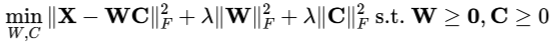

              
This will be done repeatedly by changing the cost derivative of tables W, C one step at a time n 

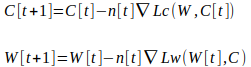


However, in order to maintain the positivity constraint of the tables, a variable step n should be used
According to (Algorithms for Non-negative Matrix Factorization, Daniel D. Lee, Sebastian Seung, https://papers.nips.cc/paper/1861-algorithms-for-non-negative-matrix-factorization.pdf)

the step for the terms to be positive should be for C and W respectively: 


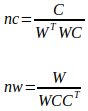


* For the iterative formula of C:

The derivative with respect to C will be: 

image.png


2 can be integrated into the learning step.

Therefore the iterative formula for C will also conform to:

(A Converged Algorithm for Tikhonov Regularized Nonnegative Matrix Factorization with Automatic Regularization Parameters Determination

Andri Mirzal 2012

https://arxiv.org/pdf/1205.2151.pdf)

for the normalization problem with λC and λW will be: 

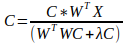


And similarly for W it will be: 

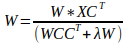

That is, the positive terms of the derivative should be in the denominator and the negative ones in the numerator. 

## Algorithm Implementation

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import time

def norm_fro(x):
  return np.linalg.norm(x, ord="fro")

def isNaN(number):
    return number != number

def RegNMF(X, k, lamda, epsilon, print_loss=False):

    # start with random non negative matrixes
    W = np.random.rand(X.shape[0],k)
    W = np.absolute(W)
    C = np.random.rand(k, X.shape[1])
    C = np.absolute(C)

    i = 0
    C_loss = []
    W_loss = []
    rebuild_loss = []
    loss = []

    if print_loss:
        print("\n\n")
        print("_"*100)
        print(" "*23+"Reg-NMF K: %d epsilon: %f lamda %f" % (k,epsilon,lamda))
        print("_"*100)

    start_time = time.time()

    while(True):

        # calcualate new matrixes with the modified gradient step
        # and also with the derivative of the regularizer
        W_step = W / (((W @ C) @ C.T ) + lamda*W )
        W_new = np.multiply(W_step, (X @ C.T)  )

        C_step = C / (((W_new.T @ W_new) @ C ) + lamda*C )
        C_new = np.multiply(C_step, (W_new.T @ X)  )


        # get the relative error
        # error = ( np.linalg.norm(X - W_new@C_new, ord="fro")**2 + lamda*np.linalg.norm(W_new, ord="fro")**2 + lamda*np.linalg.norm(C_new, ord="fro")**2 - np.linalg.norm(X - W@C, ord="fro")**2 - lamda*np.linalg.norm(W, ord="fro")**2 - lamda*np.linalg.norm(C, ord="fro")**2) / np.linalg.norm(X, ord="fro")**2
        error = ( norm_fro(X - (W_new @ C_new))**2 - norm_fro(X - (W @ C))**2 ) / norm_fro(X)**2
        error = np.abs(error)

        C = C_new
        W = W_new

        # get losses
        wl = norm_fro(W)**2
        cl = norm_fro(C)**2
        rl = norm_fro(X - W@C)**2
        l = rl + wl + cl

        W_loss.append(wl)
        C_loss.append(cl)
        rebuild_loss.append(rl)
        loss.append(l)
        i += 1

        if print_loss:
            print("[Loss: %.6f]  [Rebuild loss: %.6f]  [W loss: %.6f]  [C loss:  %.6f]  [Error: %.6f]" % (l, rl, wl, cl, error))

        if error < epsilon or isNaN(error):
            end_time = time.time()
            total_time = end_time - start_time

            if print_loss:
                print("Minimun error reached: ", l)
                print("Iterations: ", i)
                print("Time: ", total_time)
                
                fig, ax = plt.subplots(1, figsize=(7,5))

                ax.plot(loss)
                ax.plot(rebuild_loss)
                ax.plot(W_loss)
                ax.plot(C_loss)
                ax.set_title("Cost over iterations K: " + str(k) + " epsilon: "+ str(epsilon))
                ax.set_ylabel("Object function values")
                ax.set_xlabel("Iterations")
                ax.legend(["Total cost", "Rebuild cost", "W cost", "C cost"])
                plt.show()

            return loss[-1], rl, wl, cl, total_time, i, W, C
            





## Finding a better λ

Finding the best λ requires cross validation, but since we do not have such data, the algorithm will be tested for each different λ 5 times with different random non-negative arrays. After each iteration, the average cost of reconstruction and the cost of the norm in Table W plus Table C, which is the normalization error, will be printed. Finally, a graph with the two costs will be printed. 

In [ ]:

def cross_validate_for_lamda(lamda, epsilon, k):

    rebiuld_cost = []
    WC_cost = []
    for l in lamda:
        mean_rebiuld_cost = []
        mean_WC_cost = []
        for i in range(5):
            X = np.random.rand(500,1000)
            rl = RegNMF(X, k, l, epsilon)
            mean_rebiuld_cost.append(rl[1])
            mean_WC_cost.append(rl[2] + rl[3])
        print("Mean rebuild cost with l %f is %f and variance is %f" % (l,np.mean(mean_rebiuld_cost),np.var(mean_rebiuld_cost)))
        print("Mean W and C cost with l %f is %f and variance is %f" % (l,np.mean(mean_WC_cost),np.var(mean_WC_cost)))
        rebiuld_cost.append(np.mean(mean_rebiuld_cost))
        WC_cost.append(np.mean(mean_WC_cost))

    # plot rebuild cost with the cost of W and C
    fig, ax = plt.subplots(1, figsize=(7,5))
    ax.plot(WC_cost)
    ax.plot(rebiuld_cost)
    ax.set_title("rebuild cost with the cost of W and C   with K: " + str(k) + " epsilon: "+ str(epsilon))
    ax.set_ylabel("Cost")
    ax.set_xticks(list(range(len(lamda))))
    ax.set_xticklabels(lamda)
    ax.set_xlabel("lamda")
    ax.legend(["W+C cost", "Rebuild cost"])
    plt.show()


In addition, the above method will be tested for different K. 

Mean rebuild cost with l 0.000100 is 41542.791154 and variance is 2345.681651
Mean W and C cost with l 0.000100 is 725.228517 and variance is 3.387253
Mean rebuild cost with l 0.001000 is 41507.439155 and variance is 483.327613
Mean W and C cost with l 0.001000 is 728.424390 and variance is 10.689267
Mean rebuild cost with l 0.010000 is 41508.435554 and variance is 2132.062041
Mean W and C cost with l 0.010000 is 726.569273 and variance is 10.980583
Mean rebuild cost with l 1.000000 is 41546.959751 and variance is 6477.874634
Mean W and C cost with l 1.000000 is 725.867142 and variance is 6.087932
Mean rebuild cost with l 10.000000 is 41694.396136 and variance is 3303.735653
Mean W and C cost with l 10.000000 is 699.804558 and variance is 7.545072
Mean rebuild cost with l 100.000000 is 51568.129900 and variance is 1964.627745
Mean W and C cost with l 100.000000 is 506.896219 and variance is 0.024391
Mean rebuild cost with l 1000.000000 is 166813.759270 and variance is 49296.242891
Mean

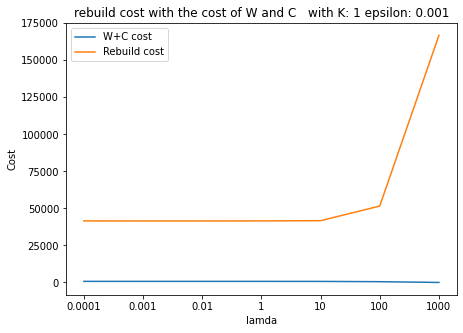

Mean rebuild cost with l 0.000100 is 42471.992710 and variance is 10341.192171
Mean W and C cost with l 0.000100 is 3502.647916 and variance is 184.654559
Mean rebuild cost with l 0.001000 is 42509.711266 and variance is 704.279886
Mean W and C cost with l 0.001000 is 3497.490993 and variance is 285.630529
Mean rebuild cost with l 0.010000 is 42491.839484 and variance is 2379.690952
Mean W and C cost with l 0.010000 is 3488.299192 and variance is 133.720662
Mean rebuild cost with l 1.000000 is 42296.389803 and variance is 637.829743
Mean W and C cost with l 1.000000 is 2818.583778 and variance is 329.238675
Mean rebuild cost with l 10.000000 is 42000.555154 and variance is 4634.773528
Mean W and C cost with l 10.000000 is 886.690007 and variance is 1.390648
Mean rebuild cost with l 100.000000 is 51945.103512 and variance is 1426.186825
Mean W and C cost with l 100.000000 is 511.982987 and variance is 0.127896
Mean rebuild cost with l 1000.000000 is 166476.046828 and variance is 22156.4

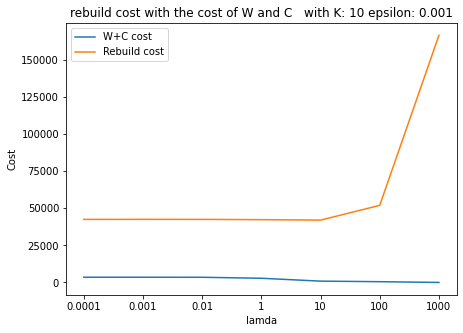

Mean rebuild cost with l 0.000100 is 41522.773605 and variance is 1335.793474
Mean W and C cost with l 0.000100 is 33518.418462 and variance is 5670.512814
Mean rebuild cost with l 0.001000 is 41540.894106 and variance is 5281.735645
Mean W and C cost with l 0.001000 is 33609.787492 and variance is 7697.363370
Mean rebuild cost with l 0.010000 is 41486.600906 and variance is 2622.091727
Mean W and C cost with l 0.010000 is 33125.877726 and variance is 12439.179441
Mean rebuild cost with l 1.000000 is 41557.714870 and variance is 1397.914616
Mean W and C cost with l 1.000000 is 6396.332095 and variance is 146.362119
Mean rebuild cost with l 10.000000 is 41667.043886 and variance is 354.508092
Mean W and C cost with l 10.000000 is 918.102535 and variance is 1.124067
Mean rebuild cost with l 100.000000 is 51989.805794 and variance is 2312.920267
Mean W and C cost with l 100.000000 is 512.931998 and variance is 0.811576
Mean rebuild cost with l 1000.000000 is 166762.387655 and variance is 

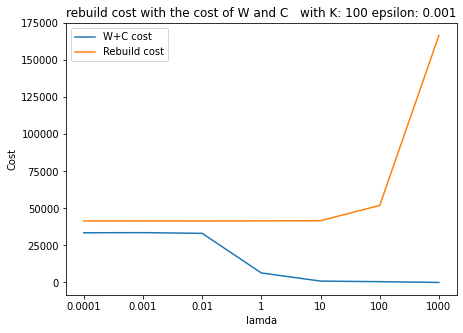

Mean rebuild cost with l 0.000100 is 41389.793845 and variance is 404.758267
Mean W and C cost with l 0.000100 is 83650.913432 and variance is 86682.717780
Mean rebuild cost with l 0.001000 is 41406.647285 and variance is 4047.130971
Mean W and C cost with l 0.001000 is 83393.597295 and variance is 18748.373292
Mean rebuild cost with l 0.010000 is 41440.316593 and variance is 1408.248925
Mean W and C cost with l 0.010000 is 81277.454050 and variance is 7492.767920
Mean rebuild cost with l 1.000000 is 41480.809068 and variance is 102.918583
Mean W and C cost with l 1.000000 is 6341.760724 and variance is 197.497428
Mean rebuild cost with l 10.000000 is 41733.289836 and variance is 1549.724790
Mean W and C cost with l 10.000000 is 937.668116 and variance is 1.424197
Mean rebuild cost with l 100.000000 is 51788.097869 and variance is 1878.052184
Mean W and C cost with l 100.000000 is 510.224817 and variance is 0.211457
Mean rebuild cost with l 1000.000000 is 166686.414342 and variance is 

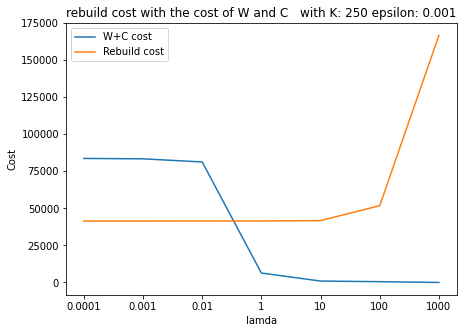

In [ ]:
lamda = [0.0001, 0.001, 0.01, 1, 10, 100, 1000]
cross_validate_for_lamda(lamda, 0.001, 1)

cross_validate_for_lamda(lamda, 0.001, 10)

cross_validate_for_lamda(lamda, 0.001, 100)

cross_validate_for_lamda(lamda, 0.001, 250)

Λ is a penalty for optimization with which, the higher the array terms tend to 0. By reducing the coefficients we can have stable solutions that do not fit very well into the data, minimizing the actual error without increases due to training error.
However, along with a large normalization penalty, we can have a large reconstruction error, a real error, as if the coefficients are too close to 0 then they will not be able to adjust even the least adequately. 

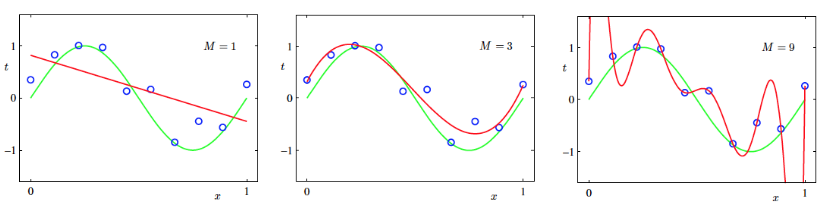


For this reason from the above graphs we observe that λ for small values ​​does not change much the size of the coefficients, which in this case are explained by the Frobenius norm of arrays W C. With a small λ, however, the cost of reconstruction is not affected. Unlike large λ, the panels W C decrease but the reconstruction cost increases a lot.

Therefore a good value for λ could be 10 which minimizes the coefficients W C and does so immediately before the reconstruction error increases significantly.


The above λ has this value after random tests of 500x1000 dimensional tables with random content from 0 to 1. Other data may have had a different optimal value for λ 

## Parameter grid testing and tuning

Different values K and epsilon k = [1, 10, 100, 250] will be tested below
epsilon = [0.1, 0.01, 0.001, 0.0001]

Λ will be 10 after the above analysis.

There will be graphs with the cost in detail with each parameter and heatmap that will show the costs and repetitions compared to all parameters. 

In [ ]:

k = [1, 10, 100, 250]
epsilon = [0.1, 0.01, 0.001, 0.0001]

def print_nmf_heatmap(heatmap, k, epsilon, title):

    fig, ax = plt.subplots(1)
    image = ax.imshow(np.array(heatmap), cmap='OrRd', interpolation='nearest')
    ax.set_title(title)
    ax.set_xticks(list(range(len(epsilon))))
    ax.set_yticks(list(range(len(k))))
    ax.set_xticklabels(epsilon)
    ax.set_yticklabels(k)
    ax.set_xlabel("epsilon")
    ax.set_ylabel("k")
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.9, 0.11, 0.02, 0.8])
    fig.colorbar(image, cax=cbar_ax)
    plt.show()


def get_NMF_cross_results(Χ, k, epsilon, l):

    iterations_heatmap = []
    loss_heatmap = []
    time_heatmap = []

    for k_ in k:
        loss = []
        timee = []
        iterations = []
        for epsilon_ in epsilon:
            results = RegNMF(X, k_, l, epsilon_, print_loss=True)
            loss_, time_, iterations_ = results[1], results[4], results[5]
            loss.append(loss_)
            timee.append(time_)
            iterations.append(iterations_)

        # get heat map results 
        loss_heatmap.append(loss)
        time_heatmap.append(timee)
        iterations_heatmap.append(iterations)

        mean_loss = np.mean(np.array(loss_heatmap).flatten())

    return iterations_heatmap, loss_heatmap, time_heatmap, mean_loss






____________________________________________________________________________________________________
                       Reg-NMF K: 1 epsilon: 0.100000 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 42527.194256]  [Rebuild loss: 41824.102283]  [W loss: 265.129319]  [C loss:  437.962654]  [Error: 0.334172]
[Loss: 42501.655204]  [Rebuild loss: 41802.351062]  [W loss: 272.929754]  [C loss:  426.374388]  [Error: 0.000130]
Minimun error reached:  42501.65520383562
Iterations:  2
Time:  0.07071352005004883


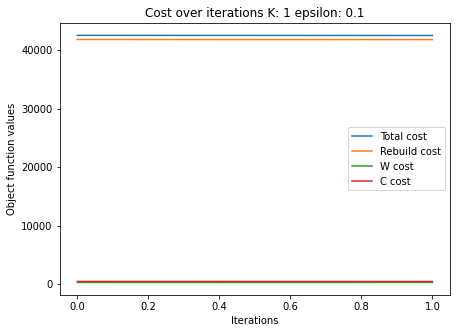




____________________________________________________________________________________________________
                       Reg-NMF K: 1 epsilon: 0.010000 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 42511.008378]  [Rebuild loss: 41813.438358]  [W loss: 276.817067]  [C loss:  420.752953]  [Error: 0.347254]
[Loss: 42486.261634]  [Rebuild loss: 41791.226994]  [W loss: 283.575079]  [C loss:  411.459562]  [Error: 0.000133]
Minimun error reached:  42486.26163400692
Iterations:  2
Time:  0.06288504600524902


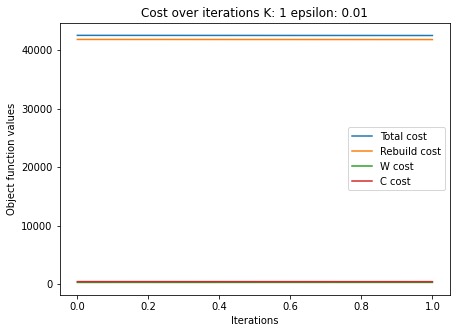




____________________________________________________________________________________________________
                       Reg-NMF K: 1 epsilon: 0.001000 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 42544.081824]  [Rebuild loss: 41835.907157]  [W loss: 256.363917]  [C loss:  451.810750]  [Error: 0.318854]
[Loss: 42514.823146]  [Rebuild loss: 41811.578447]  [W loss: 264.926806]  [C loss:  438.317893]  [Error: 0.000146]
Minimun error reached:  42514.82314620852
Iterations:  2
Time:  0.06889915466308594


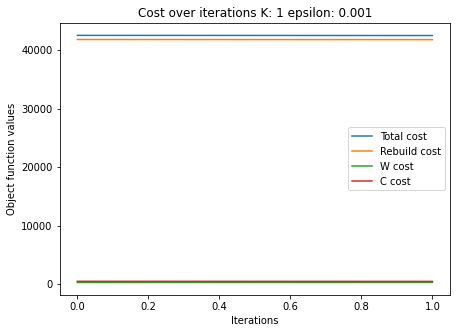




____________________________________________________________________________________________________
                       Reg-NMF K: 1 epsilon: 0.000100 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 42537.256277]  [Rebuild loss: 41831.392065]  [W loss: 260.161278]  [C loss:  445.702934]  [Error: 0.344612]
[Loss: 42508.932858]  [Rebuild loss: 41807.478393]  [W loss: 268.397994]  [C loss:  433.056470]  [Error: 0.000143]
[Loss: 42497.153694]  [Rebuild loss: 41799.140854]  [W loss: 275.882298]  [C loss:  422.130542]  [Error: 0.000050]
Minimun error reached:  42497.153694196335
Iterations:  3
Time:  0.12482690811157227


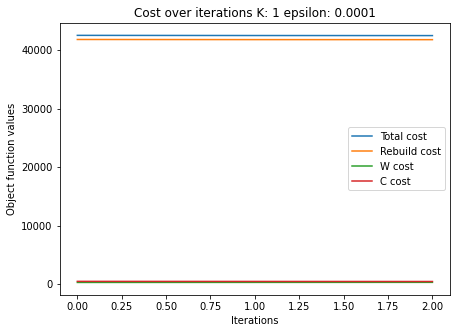




____________________________________________________________________________________________________
                       Reg-NMF K: 10 epsilon: 0.100000 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 50757.962308]  [Rebuild loss: 48649.077738]  [W loss: 59.424058]  [C loss:  2049.460512]  [Error: 13.131118]
[Loss: 46485.135669]  [Rebuild loss: 44902.645140]  [W loss: 95.036391]  [C loss:  1487.454138]  [Error: 0.022474]
Minimun error reached:  46485.13566883028
Iterations:  2
Time:  0.08224844932556152


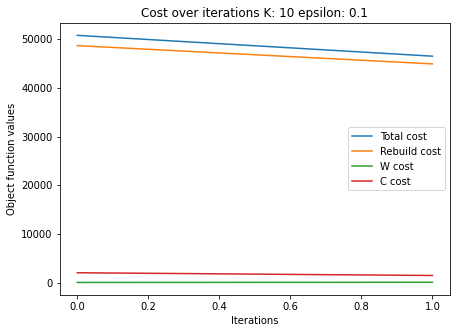




____________________________________________________________________________________________________
                       Reg-NMF K: 10 epsilon: 0.010000 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 50801.712795]  [Rebuild loss: 48693.102784]  [W loss: 59.989060]  [C loss:  2048.620951]  [Error: 13.099301]
[Loss: 46522.408854]  [Rebuild loss: 44939.402531]  [W loss: 95.900822]  [C loss:  1487.105501]  [Error: 0.022518]
[Loss: 44986.420094]  [Rebuild loss: 43675.918988]  [W loss: 126.655165]  [C loss:  1183.845941]  [Error: 0.007579]
Minimun error reached:  44986.42009443236
Iterations:  3
Time:  0.0999596118927002


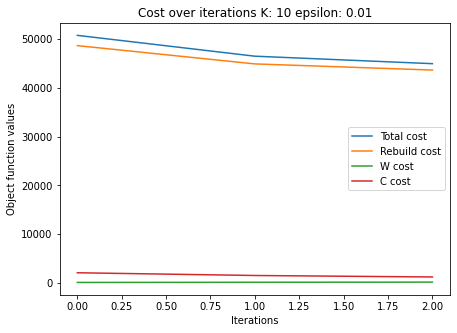




____________________________________________________________________________________________________
                       Reg-NMF K: 10 epsilon: 0.001000 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 50789.162953]  [Rebuild loss: 48671.224707]  [W loss: 58.663322]  [C loss:  2059.274924]  [Error: 13.818492]
[Loss: 46472.349049]  [Rebuild loss: 44885.394098]  [W loss: 94.141662]  [C loss:  1492.813289]  [Error: 0.022710]
[Loss: 44933.697611]  [Rebuild loss: 43621.775240]  [W loss: 124.578984]  [C loss:  1187.343386]  [Error: 0.007580]
[Loss: 44146.600303]  [Rebuild loss: 42998.417842]  [W loss: 151.807500]  [C loss:  996.374960]  [Error: 0.003739]
[Loss: 43670.019006]  [Rebuild loss: 42627.352175]  [W loss: 176.404407]  [C loss:  866.262424]  [Error: 0.002226]
[Loss: 43351.266895]  [Rebuild loss: 42380.135319]  [W loss: 198.653849]  [C loss:  772.477726]  [Error: 0.001483]
[Loss: 43123.600071]  [Rebuild l

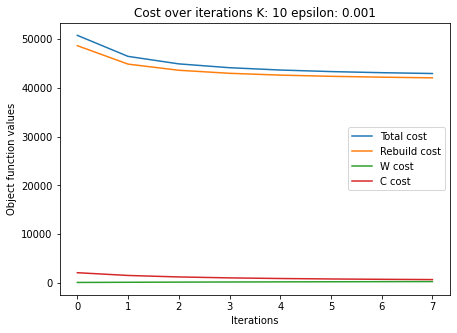




____________________________________________________________________________________________________
                       Reg-NMF K: 10 epsilon: 0.000100 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 50633.802638]  [Rebuild loss: 48531.025740]  [W loss: 59.464727]  [C loss:  2043.312171]  [Error: 13.603245]
[Loss: 46421.826056]  [Rebuild loss: 44842.361342]  [W loss: 94.855421]  [C loss:  1484.609292]  [Error: 0.022128]
[Loss: 44908.136346]  [Rebuild loss: 43600.520741]  [W loss: 125.254411]  [C loss:  1182.361194]  [Error: 0.007450]
[Loss: 44131.760357]  [Rebuild loss: 42986.229505]  [W loss: 152.458776]  [C loss:  993.072075]  [Error: 0.003685]
[Loss: 43661.226250]  [Rebuild loss: 42620.233707]  [W loss: 177.039548]  [C loss:  863.952995]  [Error: 0.002196]
[Loss: 43346.468217]  [Rebuild loss: 42376.383802]  [W loss: 199.278075]  [C loss:  770.806340]  [Error: 0.001463]
[Loss: 43121.711417]  [Rebuild l

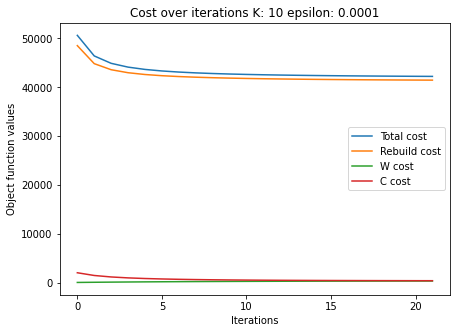




____________________________________________________________________________________________________
                       Reg-NMF K: 100 epsilon: 0.100000 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 105910.552493]  [Rebuild loss: 103440.610404]  [W loss: 6.595692]  [C loss:  2463.346397]  [Error: 1807.305999]
[Loss: 46773.237960]  [Rebuild loss: 44985.500681]  [W loss: 73.745778]  [C loss:  1713.991500]  [Error: 0.350660]
[Loss: 44808.648075]  [Rebuild loss: 43371.646367]  [W loss: 103.916822]  [C loss:  1333.084886]  [Error: 0.009681]
Minimun error reached:  44808.64807522558
Iterations:  3
Time:  0.17358756065368652


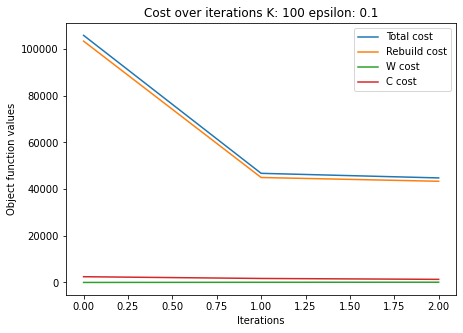




____________________________________________________________________________________________________
                       Reg-NMF K: 100 epsilon: 0.010000 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 105997.575512]  [Rebuild loss: 103530.395108]  [W loss: 6.548162]  [C loss:  2460.632242]  [Error: 1825.608094]
[Loss: 46756.770237]  [Rebuild loss: 44970.481290]  [W loss: 73.486600]  [C loss:  1712.802347]  [Error: 0.351289]
[Loss: 44797.506031]  [Rebuild loss: 43361.602830]  [W loss: 103.524113]  [C loss:  1332.379089]  [Error: 0.009651]
Minimun error reached:  44797.50603084268
Iterations:  3
Time:  0.22078204154968262


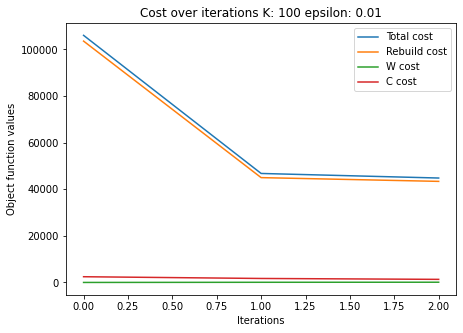




____________________________________________________________________________________________________
                       Reg-NMF K: 100 epsilon: 0.001000 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 105814.940775]  [Rebuild loss: 103342.853028]  [W loss: 6.602294]  [C loss:  2465.485454]  [Error: 1824.555139]
[Loss: 46773.785224]  [Rebuild loss: 44985.335149]  [W loss: 73.553654]  [C loss:  1714.896421]  [Error: 0.350075]
[Loss: 44806.326158]  [Rebuild loss: 43369.100613]  [W loss: 103.679454]  [C loss:  1333.546091]  [Error: 0.009695]
[Loss: 43896.836379]  [Rebuild loss: 42663.025359]  [W loss: 131.374860]  [C loss:  1102.436160]  [Error: 0.004236]
[Loss: 43380.620806]  [Rebuild loss: 42275.616854]  [W loss: 157.027960]  [C loss:  947.975991]  [Error: 0.002324]
[Loss: 43050.490952]  [Rebuild loss: 42031.608060]  [W loss: 180.755775]  [C loss:  838.127117]  [Error: 0.001464]
[Loss: 42821.895977]  [Rebu

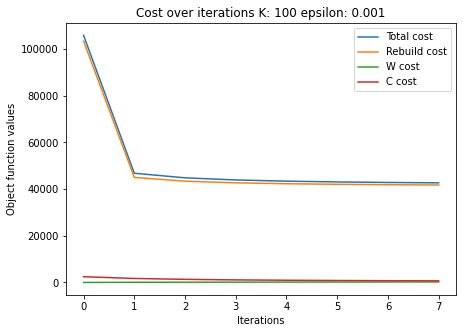




____________________________________________________________________________________________________
                       Reg-NMF K: 100 epsilon: 0.000100 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 106018.358599]  [Rebuild loss: 103550.700845]  [W loss: 6.597441]  [C loss:  2461.060313]  [Error: 1795.536985]
[Loss: 46762.663483]  [Rebuild loss: 44975.328203]  [W loss: 74.076544]  [C loss:  1713.258736]  [Error: 0.351382]
[Loss: 44801.206738]  [Rebuild loss: 43363.999151]  [W loss: 104.345772]  [C loss:  1332.861815]  [Error: 0.009666]
[Loss: 43892.633213]  [Rebuild loss: 42658.252611]  [W loss: 132.169116]  [C loss:  1102.211485]  [Error: 0.004234]
[Loss: 43376.091914]  [Rebuild loss: 42270.138418]  [W loss: 157.932448]  [C loss:  948.021048]  [Error: 0.002328]
[Loss: 43045.228782]  [Rebuild loss: 42025.123409]  [W loss: 181.752246]  [C loss:  838.353127]  [Error: 0.001470]
[Loss: 42815.752097]  [Rebu

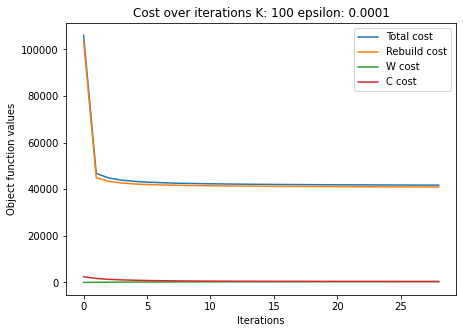




____________________________________________________________________________________________________
                       Reg-NMF K: 250 epsilon: 0.100000 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 133103.084907]  [Rebuild loss: 131571.659510]  [W loss: 2.664753]  [C loss:  1528.760644]  [Error: 11465.698082]
[Loss: 44406.052278]  [Rebuild loss: 43066.557520]  [W loss: 113.087371]  [C loss:  1226.407386]  [Error: 0.530924]
[Loss: 43698.991823]  [Rebuild loss: 42526.168285]  [W loss: 139.431050]  [C loss:  1033.392488]  [Error: 0.003242]
Minimun error reached:  43698.99182281864
Iterations:  3
Time:  0.2714090347290039


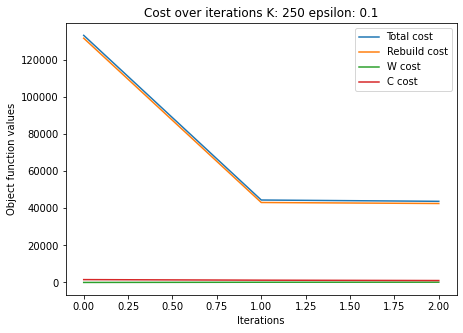




____________________________________________________________________________________________________
                       Reg-NMF K: 250 epsilon: 0.010000 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 133148.348891]  [Rebuild loss: 131618.808500]  [W loss: 2.659545]  [C loss:  1526.880846]  [Error: 11550.870745]
[Loss: 44398.377712]  [Rebuild loss: 43059.899509]  [W loss: 113.203724]  [C loss:  1225.274480]  [Error: 0.531247]
[Loss: 43693.456710]  [Rebuild loss: 42521.297295]  [W loss: 139.539442]  [C loss:  1032.619972]  [Error: 0.003231]
Minimun error reached:  43693.45670953904
Iterations:  3
Time:  0.31220579147338867


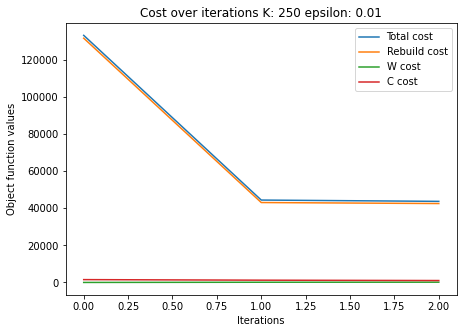




____________________________________________________________________________________________________
                       Reg-NMF K: 250 epsilon: 0.001000 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 133191.667140]  [Rebuild loss: 131663.991982]  [W loss: 2.654560]  [C loss:  1525.020598]  [Error: 11599.069258]
[Loss: 44397.288959]  [Rebuild loss: 43059.891542]  [W loss: 113.300935]  [C loss:  1224.096481]  [Error: 0.531518]
[Loss: 43694.302057]  [Rebuild loss: 42522.883667]  [W loss: 139.618977]  [C loss:  1031.799412]  [Error: 0.003221]
[Loss: 43269.417987]  [Rebuild loss: 42206.267300]  [W loss: 164.069163]  [C loss:  899.081524]  [Error: 0.001899]
[Loss: 42986.203930]  [Rebuild loss: 41996.889765]  [W loss: 186.709482]  [C loss:  802.604684]  [Error: 0.001256]
[Loss: 42784.122459]  [Rebuild loss: 41846.706540]  [W loss: 207.571805]  [C loss:  729.844114]  [Error: 0.000901]
Minimun error reached:  42

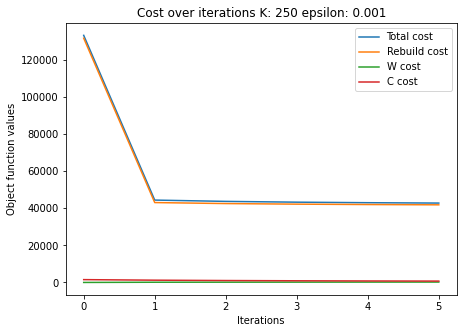




____________________________________________________________________________________________________
                       Reg-NMF K: 250 epsilon: 0.000100 lamda 10.000000
____________________________________________________________________________________________________
[Loss: 133158.348581]  [Rebuild loss: 131629.185450]  [W loss: 2.648958]  [C loss:  1526.514173]  [Error: 11640.392703]
[Loss: 44404.288745]  [Rebuild loss: 43066.518399]  [W loss: 112.819755]  [C loss:  1224.950592]  [Error: 0.531269]
[Loss: 43699.902604]  [Rebuild loss: 42528.529761]  [W loss: 139.068788]  [C loss:  1032.304055]  [Error: 0.003227]
[Loss: 43274.480230]  [Rebuild loss: 42211.652151]  [W loss: 163.460583]  [C loss:  899.367496]  [Error: 0.001901]
[Loss: 42991.088448]  [Rebuild loss: 42002.295559]  [W loss: 186.052988]  [C loss:  802.739900]  [Error: 0.001256]
[Loss: 42789.004581]  [Rebuild loss: 41852.259224]  [W loss: 206.877447]  [C loss:  729.867910]  [Error: 0.000900]
[Loss: 42637.419776]  [Reb

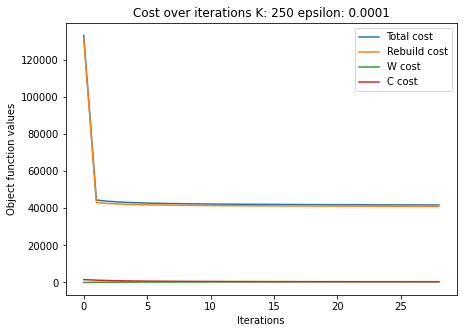

In [ ]:
Χ = np.random.rand(500,1000)
iterations_heatmap, loss_heatmap, time_heatmap, mean_loss_ = get_NMF_cross_results(Χ, k, epsilon, 10)


Heatmap diagram of repetitions and total cost in relation to k and epsilon 

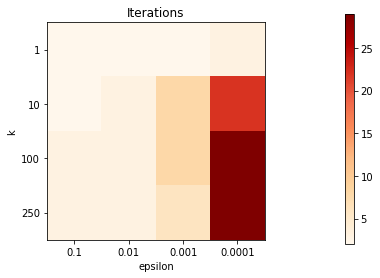

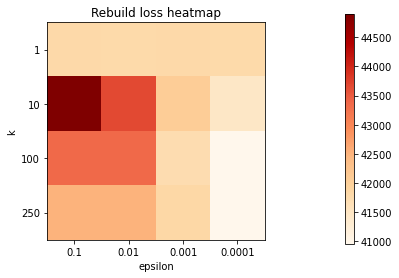

In [ ]:
print_nmf_heatmap(iterations_heatmap, k, epsilon, "Iterations")
print_nmf_heatmap(loss_heatmap, k, epsilon, "Rebuild loss heatmap")

Test with λ = 1 for better explanation of the results. 




____________________________________________________________________________________________________
                       Reg-NMF K: 1 epsilon: 0.100000 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 42382.522251]  [Rebuild loss: 41661.323171]  [W loss: 283.998913]  [C loss:  437.200166]  [Error: 0.323250]
[Loss: 42368.524774]  [Rebuild loss: 41647.661516]  [W loss: 284.729631]  [C loss:  436.133628]  [Error: 0.000082]
Minimun error reached:  42368.52477447029
Iterations:  2
Time:  0.050554752349853516


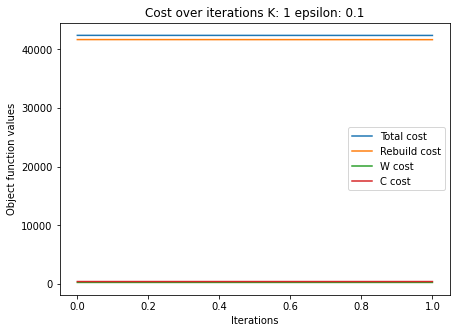




____________________________________________________________________________________________________
                       Reg-NMF K: 1 epsilon: 0.010000 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 42391.498010]  [Rebuild loss: 41661.287878]  [W loss: 269.267777]  [C loss:  460.942355]  [Error: 0.344430]
[Loss: 42377.494159]  [Rebuild loss: 41647.830952]  [W loss: 270.127296]  [C loss:  459.535911]  [Error: 0.000081]
Minimun error reached:  42377.49415864102
Iterations:  2
Time:  0.052529096603393555


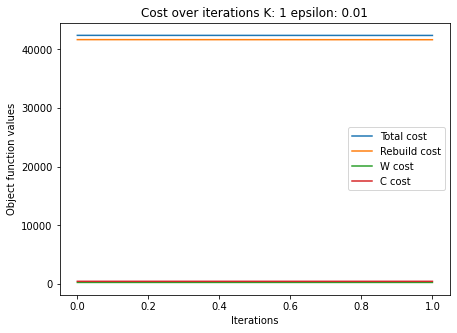




____________________________________________________________________________________________________
                       Reg-NMF K: 1 epsilon: 0.001000 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 42383.405671]  [Rebuild loss: 41660.611445]  [W loss: 281.073831]  [C loss:  441.720395]  [Error: 0.338481]
[Loss: 42370.112691]  [Rebuild loss: 41647.693094]  [W loss: 281.829090]  [C loss:  440.590507]  [Error: 0.000077]
Minimun error reached:  42370.112690852795
Iterations:  2
Time:  0.04533028602600098


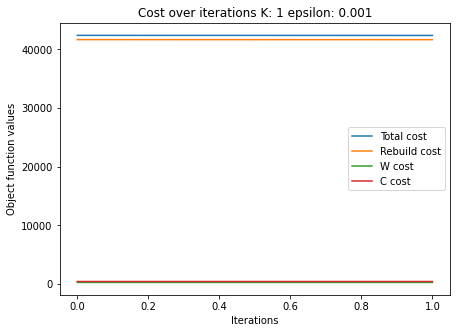




____________________________________________________________________________________________________
                       Reg-NMF K: 1 epsilon: 0.000100 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 42385.840813]  [Rebuild loss: 41664.042717]  [W loss: 282.860952]  [C loss:  438.937145]  [Error: 0.330047]
[Loss: 42369.127972]  [Rebuild loss: 41647.673618]  [W loss: 283.608003]  [C loss:  437.846352]  [Error: 0.000098]
Minimun error reached:  42369.12797239705
Iterations:  2
Time:  0.054532527923583984


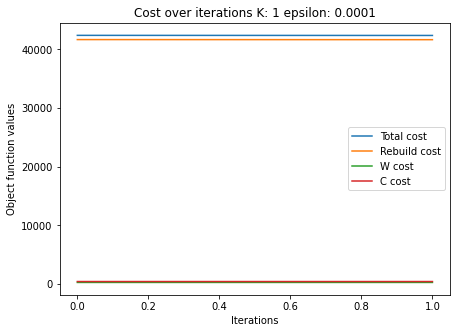




____________________________________________________________________________________________________
                       Reg-NMF K: 10 epsilon: 0.100000 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 46344.644721]  [Rebuild loss: 43000.134904]  [W loss: 60.685658]  [C loss:  3283.824159]  [Error: 13.301948]
[Loss: 45915.034817]  [Rebuild loss: 42774.416881]  [W loss: 63.527681]  [C loss:  3077.090256]  [Error: 0.001354]
Minimun error reached:  45915.03481699097
Iterations:  2
Time:  0.03332018852233887


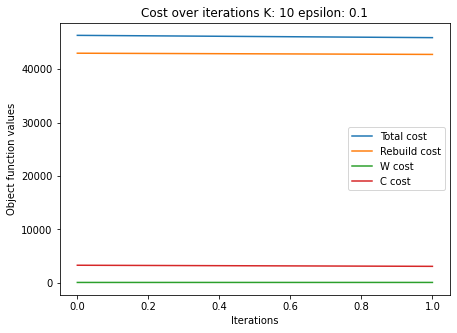




____________________________________________________________________________________________________
                       Reg-NMF K: 10 epsilon: 0.010000 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 46411.266515]  [Rebuild loss: 43072.179933]  [W loss: 60.943664]  [C loss:  3278.142918]  [Error: 13.388002]
[Loss: 45973.265379]  [Rebuild loss: 42839.938777]  [W loss: 63.810320]  [C loss:  3069.516282]  [Error: 0.001393]
Minimun error reached:  45973.265379434255
Iterations:  2
Time:  0.08105635643005371


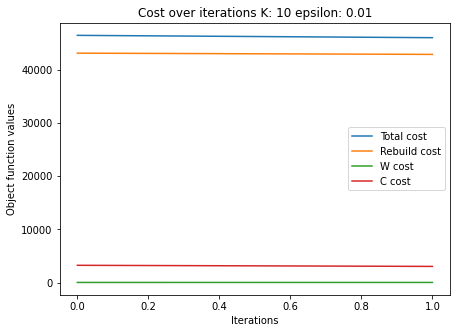




____________________________________________________________________________________________________
                       Reg-NMF K: 10 epsilon: 0.001000 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 46361.400554]  [Rebuild loss: 43027.023128]  [W loss: 60.985207]  [C loss:  3273.392219]  [Error: 13.221225]
[Loss: 45927.826277]  [Rebuild loss: 42797.160012]  [W loss: 63.819231]  [C loss:  3066.847034]  [Error: 0.001379]
[Loss: 45563.778203]  [Rebuild loss: 42608.781131]  [W loss: 66.624740]  [C loss:  2888.372332]  [Error: 0.001130]
[Loss: 45252.345816]  [Rebuild loss: 42450.540393]  [W loss: 69.396976]  [C loss:  2732.408447]  [Error: 0.000949]
Minimun error reached:  45252.34581638235
Iterations:  4
Time:  0.1521739959716797


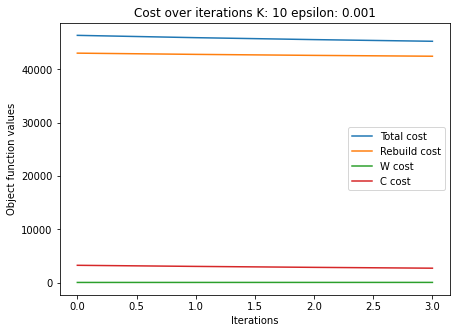




____________________________________________________________________________________________________
                       Reg-NMF K: 10 epsilon: 0.000100 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 46396.205989]  [Rebuild loss: 43039.810394]  [W loss: 60.269238]  [C loss:  3296.126358]  [Error: 13.170696]
[Loss: 45959.530816]  [Rebuild loss: 42809.463131]  [W loss: 63.097378]  [C loss:  3086.970308]  [Error: 0.001382]
[Loss: 45593.848694]  [Rebuild loss: 42621.452504]  [W loss: 65.895415]  [C loss:  2906.500774]  [Error: 0.001128]
[Loss: 45281.414877]  [Rebuild loss: 42463.783029]  [W loss: 68.659867]  [C loss:  2748.971981]  [Error: 0.000946]
[Loss: 45011.008222]  [Rebuild loss: 42329.523112]  [W loss: 71.396582]  [C loss:  2610.088528]  [Error: 0.000805]
[Loss: 44774.390404]  [Rebuild loss: 42213.687762]  [W loss: 74.110144]  [C loss:  2486.592499]  [Error: 0.000695]
[Loss: 44565.367765]  [Rebuild los

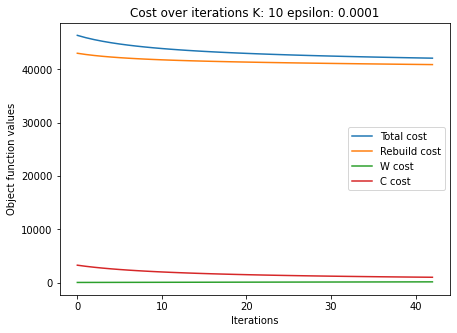




____________________________________________________________________________________________________
                       Reg-NMF K: 100 epsilon: 0.100000 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 67035.006276]  [Rebuild loss: 47036.310623]  [W loss: 6.618205]  [C loss:  19992.077448]  [Error: 1813.897775]
[Loss: 58449.476944]  [Rebuild loss: 43924.407138]  [W loss: 10.516616]  [C loss:  14514.553190]  [Error: 0.018668]
Minimun error reached:  58449.476944135036
Iterations:  2
Time:  0.12740540504455566


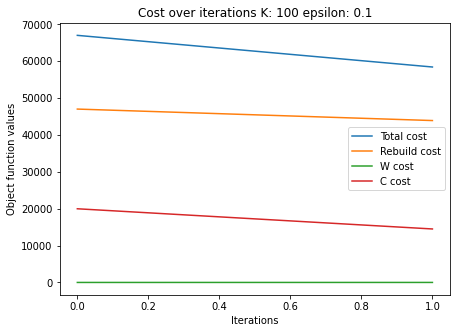




____________________________________________________________________________________________________
                       Reg-NMF K: 100 epsilon: 0.010000 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 67038.386782]  [Rebuild loss: 47043.561840]  [W loss: 6.632579]  [C loss:  19988.192363]  [Error: 1796.748978]
[Loss: 58453.486908]  [Rebuild loss: 43931.224865]  [W loss: 10.538401]  [C loss:  14511.723643]  [Error: 0.018670]
[Loss: 54352.108741]  [Rebuild loss: 42869.425514]  [W loss: 14.125388]  [C loss:  11468.557839]  [Error: 0.006370]
Minimun error reached:  54352.10874143356
Iterations:  3
Time:  0.17917251586914062


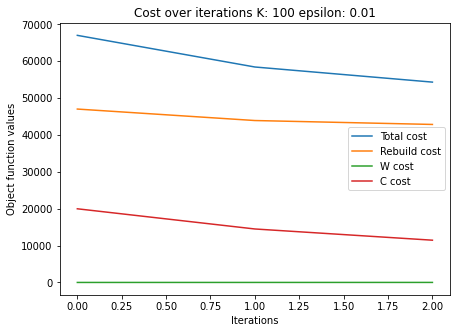




____________________________________________________________________________________________________
                       Reg-NMF K: 100 epsilon: 0.001000 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 66979.145269]  [Rebuild loss: 47012.405797]  [W loss: 6.626466]  [C loss:  19960.113006]  [Error: 1806.452424]
[Loss: 58428.163339]  [Rebuild loss: 43918.837009]  [W loss: 10.516898]  [C loss:  14498.809431]  [Error: 0.018558]
[Loss: 54337.157861]  [Rebuild loss: 42861.576588]  [W loss: 14.091190]  [C loss:  11461.490082]  [Error: 0.006342]
[Loss: 51868.462006]  [Rebuild loss: 42340.055534]  [W loss: 17.522042]  [C loss:  9510.884430]  [Error: 0.003128]
[Loss: 50195.691352]  [Rebuild loss: 42028.071010]  [W loss: 20.870625]  [C loss:  8146.749718]  [Error: 0.001872]
[Loss: 48977.499594]  [Rebuild loss: 41816.358684]  [W loss: 24.168072]  [C loss:  7136.972839]  [Error: 0.001270]
[Loss: 48044.909992]  [Rebuil

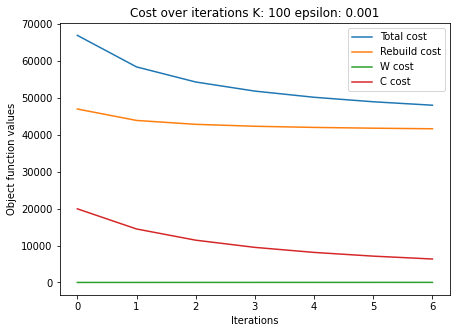




____________________________________________________________________________________________________
                       Reg-NMF K: 100 epsilon: 0.000100 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 67022.932818]  [Rebuild loss: 47030.275243]  [W loss: 6.622566]  [C loss:  19986.035009]  [Error: 1809.694874]
[Loss: 58447.411537]  [Rebuild loss: 43923.549989]  [W loss: 10.519889]  [C loss:  14513.341659]  [Error: 0.018637]
[Loss: 54348.321327]  [Rebuild loss: 42863.200252]  [W loss: 14.100185]  [C loss:  11471.020891]  [Error: 0.006361]
[Loss: 51875.683423]  [Rebuild loss: 42340.432788]  [W loss: 17.536773]  [C loss:  9517.713862]  [Error: 0.003136]
[Loss: 50200.597318]  [Rebuild loss: 42027.776592]  [W loss: 20.890976]  [C loss:  8151.929750]  [Error: 0.001876]
[Loss: 48980.881072]  [Rebuild loss: 41815.626378]  [W loss: 24.193990]  [C loss:  7141.060704]  [Error: 0.001273]
[Loss: 48047.206305]  [Rebuil

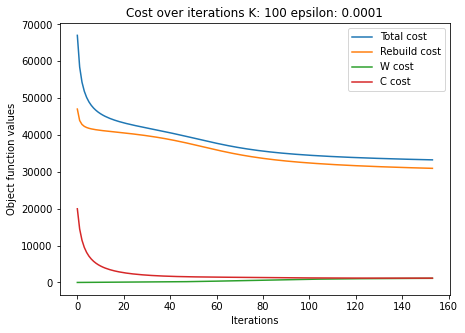




____________________________________________________________________________________________________
                       Reg-NMF K: 250 epsilon: 0.100000 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 88755.787787]  [Rebuild loss: 60319.161050]  [W loss: 2.659891]  [C loss:  28433.966846]  [Error: 11507.882357]
[Loss: 64183.265701]  [Rebuild loss: 45738.574134]  [W loss: 7.071188]  [C loss:  18437.620378]  [Error: 0.087466]
Minimun error reached:  64183.265700504635
Iterations:  2
Time:  0.26315975189208984


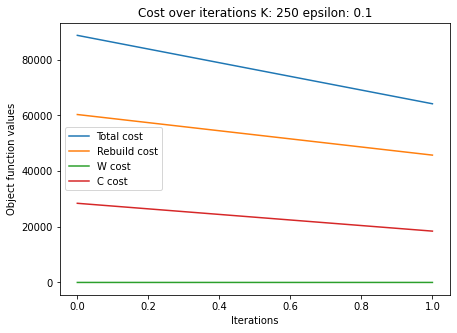




____________________________________________________________________________________________________
                       Reg-NMF K: 250 epsilon: 0.010000 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 88821.512637]  [Rebuild loss: 60368.206832]  [W loss: 2.655653]  [C loss:  28450.650152]  [Error: 11502.713711]
[Loss: 64191.473407]  [Rebuild loss: 45739.396453]  [W loss: 7.072308]  [C loss:  18445.004646]  [Error: 0.087755]
[Loss: 57347.522470]  [Rebuild loss: 43524.859578]  [W loss: 10.601308]  [C loss:  13812.061585]  [Error: 0.013285]
[Loss: 53769.364530]  [Rebuild loss: 42658.978647]  [W loss: 13.937437]  [C loss:  11096.448446]  [Error: 0.005194]
Minimun error reached:  53769.36452958344
Iterations:  4
Time:  0.4471871852874756


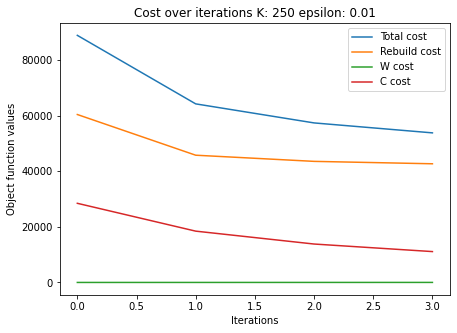




____________________________________________________________________________________________________
                       Reg-NMF K: 250 epsilon: 0.001000 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 88732.079163]  [Rebuild loss: 60298.932509]  [W loss: 2.661662]  [C loss:  28430.484992]  [Error: 11520.192438]
[Loss: 64174.481411]  [Rebuild loss: 45731.663442]  [W loss: 7.072331]  [C loss:  18435.745638]  [Error: 0.087386]
[Loss: 57337.556972]  [Rebuild loss: 43520.526553]  [W loss: 10.598421]  [C loss:  13806.431998]  [Error: 0.013264]
[Loss: 53762.247293]  [Rebuild loss: 42655.755145]  [W loss: 13.931777]  [C loss:  11092.560371]  [Error: 0.005188]
[Loss: 51518.482383]  [Rebuild loss: 42203.704695]  [W loss: 17.172521]  [C loss:  9297.605167]  [Error: 0.002712]
[Loss: 49963.051341]  [Rebuild loss: 41924.258786]  [W loss: 20.360986]  [C loss:  8018.431570]  [Error: 0.001676]
[Loss: 48813.076069]  [Rebui

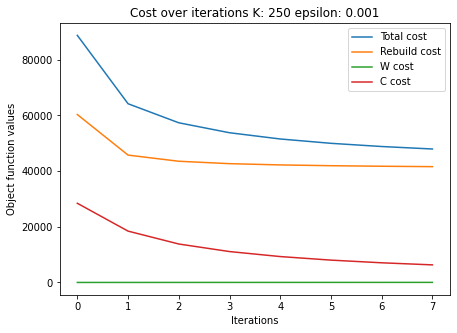




____________________________________________________________________________________________________
                       Reg-NMF K: 250 epsilon: 0.000100 lamda 1.000000
____________________________________________________________________________________________________
[Loss: 88759.392459]  [Rebuild loss: 60314.765720]  [W loss: 2.656623]  [C loss:  28441.970117]  [Error: 11595.194271]
[Loss: 64181.774142]  [Rebuild loss: 45732.097641]  [W loss: 7.063659]  [C loss:  18442.612842]  [Error: 0.087478]
[Loss: 57342.102588]  [Rebuild loss: 43520.106465]  [W loss: 10.587190]  [C loss:  13811.408934]  [Error: 0.013269]
[Loss: 53765.640198]  [Rebuild loss: 42655.265122]  [W loss: 13.918489]  [C loss:  11096.456587]  [Error: 0.005188]
[Loss: 51521.289395]  [Rebuild loss: 42203.337136]  [W loss: 17.157445]  [C loss:  9300.794815]  [Error: 0.002711]
[Loss: 49965.540893]  [Rebuild loss: 41924.076060]  [W loss: 20.344265]  [C loss:  8021.120569]  [Error: 0.001675]
[Loss: 48815.397282]  [Rebui

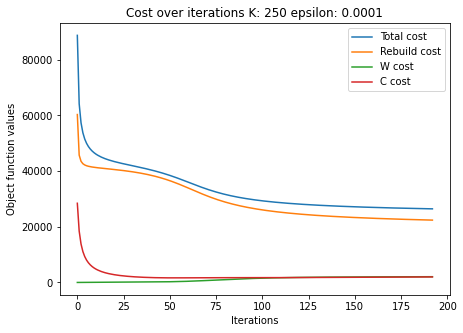

In [ ]:
Χ = np.random.rand(500,1000)
iterations_heatmap, loss_heatmap, time_heatmap, mean_loss_ = get_NMF_cross_results(Χ, k, epsilon, 1)

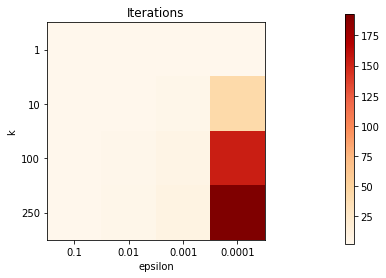

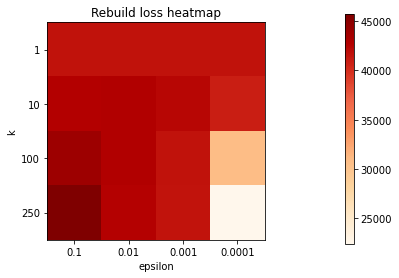

In [ ]:
print_nmf_heatmap(iterations_heatmap, k, epsilon, "Iterations")
print_nmf_heatmap(loss_heatmap, k, epsilon, "Rebuild loss heatmap")

## Explanation of results



The results after testing many different parameters are very clear.

Initially for the number of repetitions, epsilon is inversely proportional to the number of repetitions. This makes sense as epsilon shows the extent to which the algorithm will optimize the problem by repeatedly changing the parameters. If this relative threshold is too low the algorithm will have to do many iterations and optimize the parameters enough so that the relative error of the previous iteration with that of the next is less than the small epsilon 0.0001.


For K the number of repetitions is proportional to this. This means that the problem is even more difficult when we ask for factorization with two large tables. When K is large then table W will have many columns and table C will have the same rows. Having 2 large arrays we will have more parameters that will have to be configured depending on the other array. In case K is small then we will have only 2 small arrays that should be configured. With the complexity of the many parameters the problem becomes more difficult as the iterative formulas do not give optimal solutions quickly, and the algorithm requires more iterations to converge . 

Of particular interest is the reconstruction error as a function of K and epsilon

The epsilon reconstruction error shows a proportionality. This is to be expected as the smaller the limit to which our problem is optimized, the more optimal it will be to have a small error.

At the same time, K is analogous to the reconstruction error. This is explained as when we have more parameters, the convergence and reconstruction of the array is more difficult as many more numbers with large K will have to be adjusted instead of small.

Finally, there is an interesting relationship in the cost of reconstruction between K and Epsilon.
When we have a large K but also a small epsilon of the order of 0.0001, the reconstruction cost is the smallest of all the other errors and we have even the most iterations of the algorithm.

Having a large K algorithm may require more iterations, but the large number of parameters W and C helps to better reconstruct the original table, keeping much more original information than table X. For this reason it has the lowest cost. 

# Recommendation System

In this section you will implement the nearest neighbors algorithm and test the recommenstation system .

## Nearest Neighbors Algorithm

In [97]:
from sklearn.metrics.pairwise import cosine_similarity

def get_closest_vectors_order(v1, v2):
    distances = cosine_similarity(v1,v2)
    return (-distances).T.argsort()

## Data

For the recommendation data we will be comparing the posts that the user has made with the posts other users have post.

In [74]:
OTHER_USERS_JSON_DATA = """[
  {
    "id":"10000",
    "date":"29 Jul 2021",
    "user":{
      "id":"12312312",
      "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
      "firstName":"Pipis",
      "lastName":"Papa"
    },
    "content":{
      "text":"lorpon this is a tsting post",
      "file":{
        "type":"image",
        "url":"https://cdn.quasar.dev/img/mountains.jpg"
      }
    },
    "likes":[
      {
        "id":"566612312",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Smaragda",
        "lastName":"Reppa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepomnai ",
            "visibility":false
          }
        ]
      },
      {
        "id":"423423",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Pipis",
        "lastName":"Pipa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom this is mine profesional expereince",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom this is mine education",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepom i know some skills that in 3 years will be irrelevant",
            "visibility":true
          }
        ]
      }
    ],
    "comments":[
      {
        "user":{
          "id":"12312312",
          "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
          "firstName":"Andreas",
          "lastName":"Giannoutsos"
        },
        "content":{
          "text":"lorpon this is a tsting comment"
        }
      },
      {
        "user":{
          "id":"566612312",
          "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
          "firstName":"Smaragda",
          "lastName":"Reppa"
        },
        "content":{
          "text":"yees lorpon this is another testing comment"
        }
      }
    ]
  },
  {
    "id":"10002340",
    "date":"29 Jul 2021",
    "user":{
      "id":"3343453453",
      "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
      "firstName":"User3242",
      "lastName":"Userpaa"
    },
    "content":{
      "text":"lorpon this is a tsting post",
      "file":{
        "type":"video",
        "url":"https://commondatastorage.googleapis.com/gtv-videos-bucket/sample/BigBuckBunny.mp4"
      }
    },
    "likes":[
      {
        "id":"566612312",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Smaragda",
        "lastName":"Reppa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepomnai ",
            "visibility":false
          }
        ]
      },
      {
        "id":"423423",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Pipis",
        "lastName":"Pipa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom this is mine profesional expereince",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom this is mine education",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepom i know some skills that in 3 years will be irrelevant",
            "visibility":true
          }
        ]
      }
    ],
    "comments":[
      {
        "user":{
          "id":"12312312",
          "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
          "firstName":"Andreas",
          "lastName":"Giannoutsos"
        },
        "content":{
          "text":"lorpon this is a tsting comment"
        }
      },
      {
        "user":{
          "id":"566612312",
          "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
          "firstName":"Smaragda",
          "lastName":"Reppa"
        },
        "content":{
          "text":"yees lorpon this is another testing comment"
        }
      }
    ]
  },
  {
    "id":"20000",
    "date":"29 Jul 2021",
    "user":{
      "id":"566612312",
      "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
      "firstName":"Smaragda",
      "lastName":"Reppa"
    },
    "content":{
      "text":"ok yess this is another tsting post yeees, ok yess this is another tsting post yeees ok yess this is another tsting post yeees, ok yess this is another tsting post yeees",
      "file":{
        "type":"file",
        "url":"https://cdn.quasar.dev/img/mountains.jpg"
      }
    },
    "likes":[
      {
        "id":"566612312",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Smaragda",
        "lastName":"Reppa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepomnai ",
            "visibility":false
          }
        ]
      },
      {
        "id":"423423",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Pipis",
        "lastName":"Pipa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom this is mine profesional expereince",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom this is mine education",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepom i know some skills that in 3 years will be irrelevant",
            "visibility":true
          }
        ]
      }
    ],
    "comments":[
      {
        "user":{
          "id":"12312312",
          "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
          "firstName":"Andreas",
          "lastName":"Giannoutsos"
        },
        "content":{
          "text":"123 another lorpon this is a tsting comment"
        }
      },
      {
        "user":{
          "id":"566612312",
          "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
          "firstName":"Smaragda",
          "lastName":"Reppa"
        },
        "content":{
          "text":"coment here yees it workss"
        }
      }
    ]
  }
]"""


MINE_USER_JSON_DATA = """[
  {
    "id":"10000",
    "date":"29 Jul 2021",
    "user":{
      "id":"12312312",
      "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
      "firstName":"Pipis",
      "lastName":"Papa"
    },
    "content":{
      "text":"This is mine post lorpon this is a tsting post",
      "file":{
        "type":"image",
        "url":"https://cdn.quasar.dev/img/mountains.jpg"
      }
    },
    "likes":[
      {
        "id":"566612312",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Smaragda",
        "lastName":"Reppa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepomnai ",
            "visibility":false
          }
        ]
      },
      {
        "id":"423423",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Pipis",
        "lastName":"Pipa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom this is mine profesional expereince",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom this is mine education",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepom i know some skills that in 3 years will be irrelevant",
            "visibility":true
          }
        ]
      }
    ],
    "comments":[
      {
        "user":{
          "id":"12312312",
          "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
          "firstName":"Andreas",
          "lastName":"Giannoutsos"
        },
        "content":{
          "text":"This is mine post lorpon this is a tsting comment"
        }
      },
      {
        "user":{
          "id":"566612312",
          "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
          "firstName":"Smaragda",
          "lastName":"Reppa"
        },
        "content":{
          "text":"This is mine post yees lorpon this is another testing comment"
        }
      }
    ]
  },
  {
    "id":"20000",
    "date":"29 Jul 2021",
    "user":{
      "id":"566612312",
      "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
      "firstName":"Smaragda",
      "lastName":"Reppa"
    },
    "content":{
      "text":"This is mine post ok yess this is another tsting post yeees, ok yess this is another tsting post yeees ok yess this is another tsting post yeees, ok yess this is another tsting post yeees",
      "file":{
        "type":"file",
        "url":"https://cdn.quasar.dev/img/mountains.jpg"
      }
    },
    "likes":[
      {
        "id":"566612312",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Smaragda",
        "lastName":"Reppa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom ",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepomnai ",
            "visibility":false
          }
        ]
      },
      {
        "id":"423423",
        "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
        "firstName":"Pipis",
        "lastName":"Pipa",
        "connected":true,
        "personalData":[
          {
            "title":"Profession",
            "content":"KOroideuo KOsmo",
            "visibility":false
          },
          {
            "title":"Current Job Position",
            "content":"KOroideuo KOsmo",
            "visibility":true
          },
          {
            "title":"Professional Experience",
            "content":"Lorepom this is mine profesional expereince",
            "visibility":true
          },
          {
            "title":"Education",
            "content":"Lorepom this is mine education",
            "visibility":true
          },
          {
            "title":"Skills",
            "content":"Lorepom i know some skills that in 3 years will be irrelevant",
            "visibility":true
          }
        ]
      }
    ],
    "comments":[
      {
        "user":{
          "id":"12312312",
          "avatar":"https://cdn.quasar.dev/img/boy-avatar.png",
          "firstName":"Andreas",
          "lastName":"Giannoutsos"
        },
        "content":{
          "text":"This is mine post 123 another lorpon this is a tsting comment"
        }
      },
      {
        "user":{
          "id":"566612312",
          "avatar":"https://cdn.quasar.dev/img/avatar2.jpg",
          "firstName":"Smaragda",
          "lastName":"Reppa"
        },
        "content":{
          "text":"This is mine post coment here yees it workss"
        }
      }
    ]
  }
]"""

## All together Recommendation System

In [107]:
def get_recommendations(OTHER_USERS_JSON_DATA, MINE_USER_JSON_DATA):
    oher_users_posts = JSON_to_Features(OTHER_USERS_JSON_DATA)
    mine_user_posts = JSON_to_Features(MINE_USER_JSON_DATA)

    # get compressed vectors of features
    oher_users_posts_compressed = RegNMF(oher_users_posts, k=10, lamda=0.0001, epsilon=0.01, print_loss=False)[-2]
    mine_user_posts_compressed = RegNMF(mine_user_posts, k=10, lamda=0.0001, epsilon=0.01, print_loss=False)[-2]

    # find the mean average of the my user feature 
    mine_user_posts_compressed_average = mine_user_posts_compressed.mean(axis=0)

    # get the closest vectors -> posts
    recommended_posts_order = get_closest_vectors_order(oher_users_posts_compressed, mine_user_posts_compressed_average)

    return recommended_posts_order

And this order is the best recommended order that suits our user needs for content

In [108]:
get_recommendations(OTHER_USERS_JSON_DATA, MINE_USER_JSON_DATA)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


array([[2, 0, 1]])

# One function for python module

In [109]:
import json 
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


def JSON_to_Features(JSON_DATA):

    # convert json to python
    data = json.loads(JSON_DATA)

    # get the text from the posts
    posts = []
    texts = ""

    for post in data:
        texts += post["content"]["text"]
        for comment in post["comments"]:
            texts += comment["content"]["text"]
        posts.append(texts)
        texts = ""

    # vectorize them
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500)
    count_vectorizer = CountVectorizer(ngram_range=(1,2), max_features=500)
    tfidf_matrice = vectorizer.fit_transform(posts).todense()
    count_matrice = vectorizer.fit_transform(posts).todense()

    # expand matrices if features are not enough
    if tfidf_matrice.shape[1] < 500:
        zero_fill = np.zeros((tfidf_matrice.shape[0], 500 - tfidf_matrice.shape[1]))
        tfidf_matrice = np.concatenate((tfidf_matrice,zero_fill), axis=1)

    if count_matrice.shape[1] < 500:
        zero_fill = np.zeros((count_matrice.shape[0], 500 - count_matrice.shape[1]))
        count_matrice = np.concatenate((count_matrice,zero_fill), axis=1) 

    feature_matrice = np.concatenate((tfidf_matrice,count_matrice), axis=1)

    return feature_matrice


def norm_fro(x):
  return np.linalg.norm(x, ord="fro")


def isNaN(number):
    return number != number


def RegNMF(X, k, lamda, epsilon, print_loss=False):

    # start with random non negative matrixes
    W = np.random.rand(X.shape[0],k)
    W = np.absolute(W)
    C = np.random.rand(k, X.shape[1])
    C = np.absolute(C)

    i = 0
    C_loss = []
    W_loss = []
    rebuild_loss = []
    loss = []

    if print_loss:
        print("\n\n")
        print("_"*100)
        print(" "*23+"Reg-NMF K: %d epsilon: %f lamda %f" % (k,epsilon,lamda))
        print("_"*100)

    start_time = time.time()

    while(True):

        # calcualate new matrixes with the modified gradient step
        # and also with the derivative of the regularizer
        W_step = W / (((W @ C) @ C.T ) + lamda*W )
        W_new = np.multiply(W_step, (X @ C.T)  )

        C_step = C / (((W_new.T @ W_new) @ C ) + lamda*C )
        C_new = np.multiply(C_step, (W_new.T @ X)  )


        # get the relative error
        # error = ( np.linalg.norm(X - W_new@C_new, ord="fro")**2 + lamda*np.linalg.norm(W_new, ord="fro")**2 + lamda*np.linalg.norm(C_new, ord="fro")**2 - np.linalg.norm(X - W@C, ord="fro")**2 - lamda*np.linalg.norm(W, ord="fro")**2 - lamda*np.linalg.norm(C, ord="fro")**2) / np.linalg.norm(X, ord="fro")**2
        error = ( norm_fro(X - (W_new @ C_new))**2 - norm_fro(X - (W @ C))**2 ) / norm_fro(X)**2
        error = np.abs(error)

        C = C_new
        W = W_new

        # get losses
        wl = norm_fro(W)**2
        cl = norm_fro(C)**2
        rl = norm_fro(X - W@C)**2
        l = rl + wl + cl

        W_loss.append(wl)
        C_loss.append(cl)
        rebuild_loss.append(rl)
        loss.append(l)
        i += 1

        if print_loss:
            print("[Loss: %.6f]  [Rebuild loss: %.6f]  [W loss: %.6f]  [C loss:  %.6f]  [Error: %.6f]" % (l, rl, wl, cl, error))

        if error < epsilon or isNaN(error):
            end_time = time.time()
            total_time = end_time - start_time

            if print_loss:
                print("Minimun error reached: ", l)
                print("Iterations: ", i)
                print("Time: ", total_time)
                
                fig, ax = plt.subplots(1, figsize=(7,5))

                ax.plot(loss)
                ax.plot(rebuild_loss)
                ax.plot(W_loss)
                ax.plot(C_loss)
                ax.set_title("Cost over iterations K: " + str(k) + " epsilon: "+ str(epsilon))
                ax.set_ylabel("Object function values")
                ax.set_xlabel("Iterations")
                ax.legend(["Total cost", "Rebuild cost", "W cost", "C cost"])
                plt.show()

            return loss[-1], rl, wl, cl, total_time, i, W, C


def get_closest_vectors_order(v1, v2):
    distances = cosine_similarity(v1,v2)
    return (-distances).T.argsort()      



def get_recommendations(OTHER_USERS_JSON_DATA, MINE_USER_JSON_DATA):
    oher_users_posts = JSON_to_Features(OTHER_USERS_JSON_DATA)
    mine_user_posts = JSON_to_Features(MINE_USER_JSON_DATA)

    # get compressed vectors of features
    oher_users_posts_compressed = RegNMF(oher_users_posts, k=10, lamda=0.0001, epsilon=0.01, print_loss=False)[-2]
    mine_user_posts_compressed = RegNMF(mine_user_posts, k=10, lamda=0.0001, epsilon=0.01, print_loss=False)[-2]

    # find the mean average of the my user feature 
    mine_user_posts_compressed_average = mine_user_posts_compressed.mean(axis=0)

    # get the closest vectors -> posts
    recommended_posts_order = get_closest_vectors_order(oher_users_posts_compressed, mine_user_posts_compressed_average)

    return recommended_posts_order